In [70]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\my_random_projects\StudentPerformanceFactors.csv')

In [3]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


<AxesSubplot:xlabel='Exam_Score', ylabel='Density'>

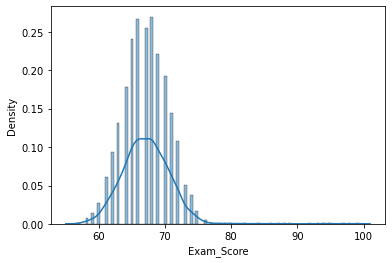

In [73]:
sns.histplot(df['Exam_Score'], kde=True, stat="density")

Motivation_Level
High      AxesSubplot(0.125,0.125;0.775x0.755)
Low       AxesSubplot(0.125,0.125;0.775x0.755)
Medium    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Previous_Scores, dtype: object

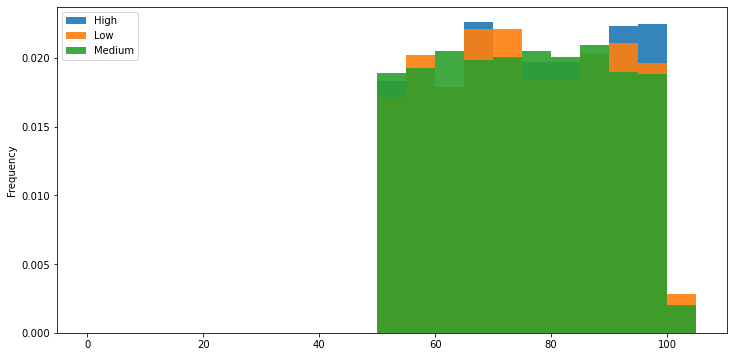

In [65]:
# So where does this moivation level come from? Previous score?
group_motivation = df.groupby('Motivation_Level')['Previous_Scores'] 
group_motivation.plot(kind='hist', bins=bin_values, figsize=[12,6], density=True, alpha=0.9, legend=True)

######  Seems like students with higher previous score have higher motivation

# Cheking for students with progress and regress

In [5]:
# Find difference between previous and current scores
df['Score_change'] = df['Exam_Score'] - df['Previous_Scores']

In [6]:
# AVG. difference between students with progress and regress
df.loc[df['Score_change'] > 0]['Score_change'].mean(), df.loc[df['Score_change'] < 0]['Score_change'].mean()

(8.69252336448598, -16.243536472760848)

<AxesSubplot:>

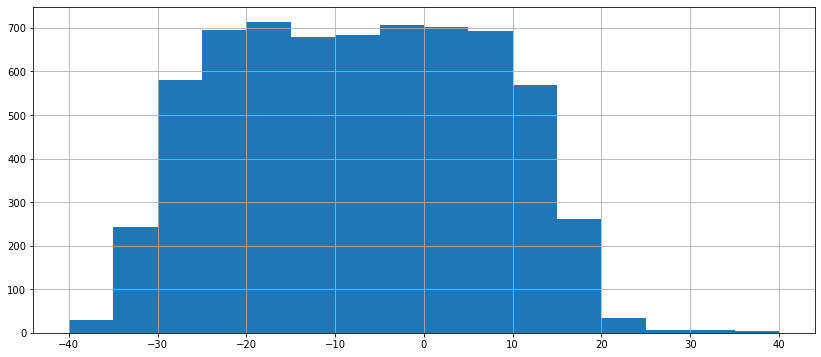

In [45]:
bin_values = np.arange(start=-40, stop=45, step=5)
df['Score_change'].hist(bins=bin_values, figsize=[14,6])

Motivation_Level
High      AxesSubplot(0.125,0.125;0.775x0.755)
Low       AxesSubplot(0.125,0.125;0.775x0.755)
Medium    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Score_change, dtype: object

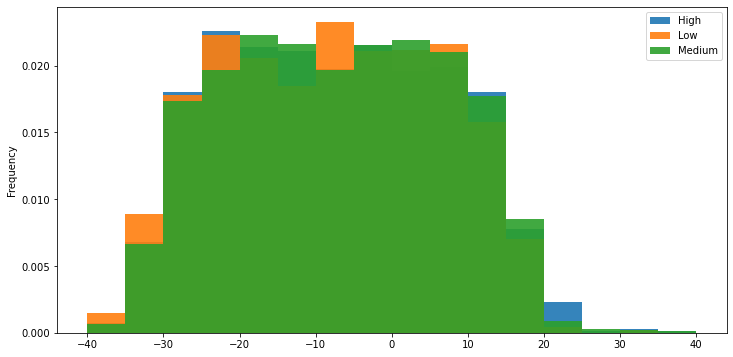

In [58]:
group_motivation = df.groupby('Motivation_Level')['Score_change'] 
group_motivation.plot(kind='hist', bins=bin_values, figsize=[12,6], density=True, alpha=0.9, legend=True)

So it seems easier to lose score compared to gain score!=)

# Cheking which parameter has the most effect on score change

<AxesSubplot:xlabel='Score_change', ylabel='Tutoring_Sessions'>

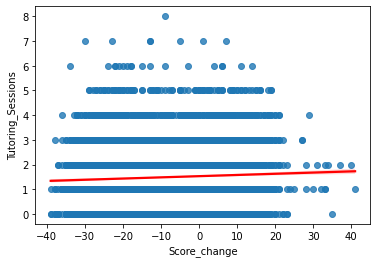

In [16]:
sns.regplot(data=df, x="Score_change", y="Tutoring_Sessions", line_kws=dict(color="r"))

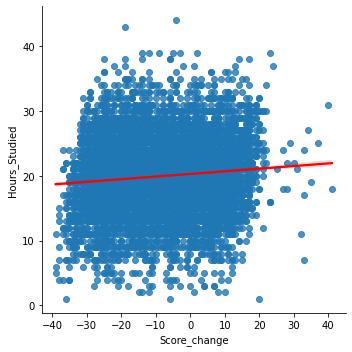

In [80]:
sns.regplot(data=df, x="Score_change", y="Hours_Studied", line_kws=dict(color="r"))

<AxesSubplot:xlabel='Score_change', ylabel='Sleep_Hours'>

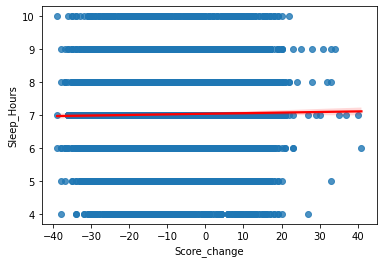

In [15]:
sns.regplot(data=df, x="Score_change", y="Sleep_Hours", line_kws=dict(color="r"))

In [32]:
df['Motivation_Level_Label'] = 1
df.loc[df['Motivation_Level'] == 'High', 'Motivation_Level_Label'] = 2
df.loc[df['Motivation_Level'] == 'Medium', 'Motivation_Level_Label'] = 3

<AxesSubplot:xlabel='Score_change', ylabel='Motivation_Level_Label'>

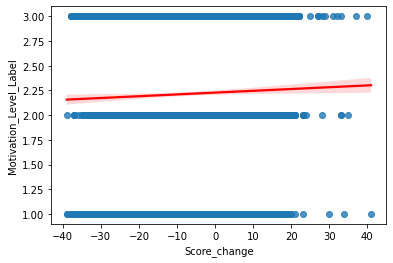

In [33]:
sns.regplot(data=df, x="Score_change", y="Motivation_Level_Label", line_kws=dict(color="r"))

In [96]:
df_numeric = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions',
                 'Physical_Activity', 'Exam_Score']]

<AxesSubplot:>

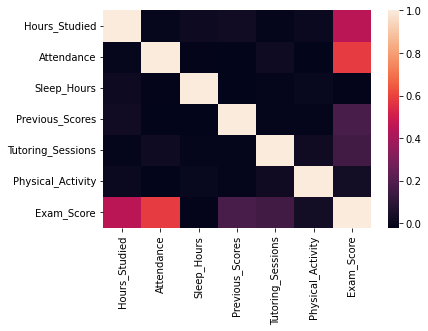

In [94]:
sns.heatmap(df_numeric.corr())

##### Looks like most important factors are Hours_studied and Attedance

<AxesSubplot:xlabel='Exam_Score', ylabel='Hours_Studied'>

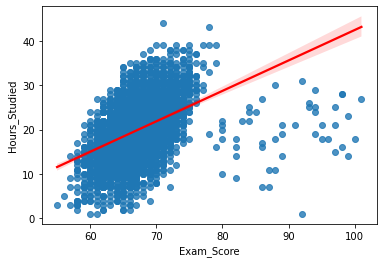

In [84]:
sns.regplot(data=df, x="Exam_Score", y="Hours_Studied", line_kws=dict(color="r"))

<AxesSubplot:xlabel='Exam_Score', ylabel='Attendance'>

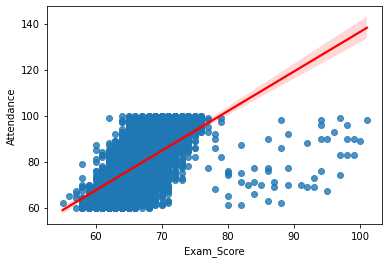

In [85]:
sns.regplot(data=df, x="Exam_Score", y="Attendance", line_kws=dict(color="r"))

In [112]:
# Checking for null values
df_numeric.isnull().sum()

Hours_Studied        0
Attendance           0
Sleep_Hours          0
Previous_Scores      0
Tutoring_Sessions    0
Physical_Activity    0
Exam_Score           0
dtype: int64

In [100]:
x = df_numeric.iloc[:,:-1]
y = df_numeric['Exam_Score']

# Normalize dataset

In [102]:
scale = preprocessing.StandardScaler().fit(x)
x = scale.fit_transform(x)

# Train Test split

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

# Model

In [104]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

# Evaluation

In [108]:
from sklearn.metrics import r2_score
y_pred = regr.predict(x_test)
r2_score(y_test,y_pred)

0.558007725035482